In [31]:
import pandas as pd
docs = pd.read_csv('../datasets/smsspamcollection.csv', header=None, names=['CLASS', 'SMS'])
docs.head()

,CLASS,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
ham_spam_distribution = docs.CLASS.value_counts()
spam_percentage = round(ham_spam_distribution['spam'] / (ham_spam_distribution['ham'] + ham_spam_distribution['spam']) * 100, 2)
print("Spam rate is {0}%".format(spam_percentage))

Spam rate is 13.41%


In [33]:
docs['LABEL'] = docs.CLASS.map({'ham':0, 'spam':1})
docs.drop('CLASS', axis=1)

,SMS,LABEL
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [34]:
X = docs.SMS
y = docs.LABEL
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [36]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: SMS, dtype: object

In [37]:
y_train.head()

710     1
3740    0
2711    1
3155    1
3748    0
Name: LABEL, dtype: int64

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')

In [39]:
vect.fit(X_train)
len(vect.vocabulary_.keys())

7204

In [40]:
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [41]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(X_train_transformed, y_train)

y_pred_class = bnb.predict(X_test_transformed)

y_pred_probability = bnb.predict_proba(X_test_transformed)

In [42]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9770279971284996

In [43]:
confusion_metrics = metrics.confusion_matrix(y_test, y_pred_class)
TN = confusion_metrics[0][0]
FP = confusion_metrics[0][1]
FN = confusion_metrics[1][0]
TP = confusion_metrics[1][1]

In [44]:
sensitivity = TP / (TP + FN)
print("Sensitivity: ", sensitivity)

Sensitivity:  0.8324324324324325


In [45]:
specificity = TN / (TN + FP)
print("Specificity: ", specificity)

Specificity:  0.9991721854304636


In [46]:
precision = TP / (TP + FP)
print("Precision: ", precision)

Precision:  0.9935483870967742


In [47]:
from sklearn.metrics import confusion_matrix as sk_confusion_metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_probability[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)


0.9967692858421334


In [48]:
pd.DataFrame({
    'Thresholds': thresholds,
    'TPR': true_positive_rate,
    'FPR': false_positive_rate
})

,Thresholds,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.254054,0.000000
2,1.000000e+00,0.286486,0.000000
3,1.000000e+00,0.297297,0.000000
4,1.000000e+00,0.302703,0.000000
...,...,...,...
101,3.481678e-13,1.000000,0.932119
102,3.468137e-13,1.000000,0.933775
103,3.256825e-13,1.000000,0.935430
104,3.248228e-13,1.000000,0.937086


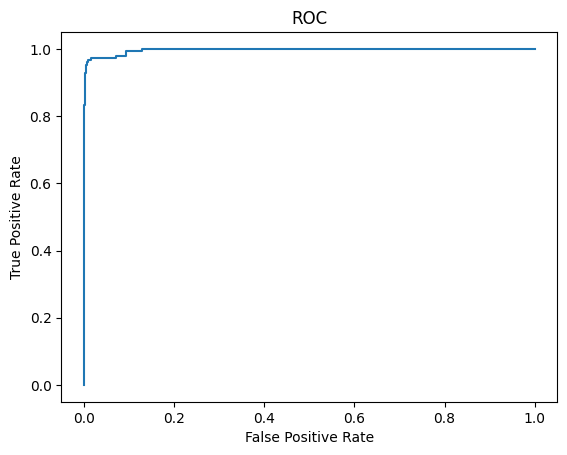

In [49]:
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)